## Summarize total counts of trash by high-level categories for MDMAP dataset 

In [82]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

Import `category_map.csv` and create a dictionary:

In [62]:
cat_map = pd.read_csv('category_map.csv')
catdict = {key:value for key,value in zip(cat_map['Column Name'], cat_map['High-Level Category'])}

Import cleaned MDMAP_Accumulation data:

In [63]:
mdmap_all = pd.read_csv('data_processed/mdmap_accumulation_totalarea_zerosremoved.csv')

Map MDMAP trash subcategories to their corresponding `High-Level Category`:

In [64]:
# Create a dataframe of the subcategories:
mdmap_subset = mdmap_all[['UniqueId',
                'Hard Plastic Fragments', 
                'Foamed Plastic Fragments', 
                'Filmed Plastic Fragments', 
                'Food Wrappers', 
                'Plastic Beverage Bottles', 
                'Other Jugs/Containers', 
                'Bottle/Container Caps', 
                'Cigar Tips', 
                'Cigarettes', 
                'Disposable Cigarette Lighters', 
                '6-Pack Rings', 
                'Bags', 
                'Plastic Rope/Net', 
                'Buoys & Floats', 
                'Fishing Lures & Line', 
                'Cups', 
                'Plastic Utensils', 
                'Straws', 
                'Balloons Mylar', 
                'Personal Care Products', 
                'Plastic Other', 
                'Metal', 
                'Aluminum/Tin Cans', 
                'Aerosol Cans', 
                'Metal Fragments', 
                'Metal Other', 
                'Glass', 
                'Glass Beverage Bottles', 
                'Jars', 
                'Glass Fragments', 
                'Glass Other', 
                'Rubber', 
                'Flip Flops', 
                'Rubber Gloves', 
                'Tires', 
                'Balloons Latex', 
                'Rubber Fragments', 
                'Rubber Other', 
                'Processed Lumber', 
                'Cardboard Cartons', 
                'Paper and Cardboard', 
                'Paper Bags', 
                'Lumber/Building Material', 
                'Processed Lumber Other', 
                'Cloth/Fabric', 
                'Clothing & Shoes', 
                'Gloves (non-rubber)', 
                'Towels/Rags', 
                'Rope/Net Pieces (non-nylon)', 
                'Fabric Pieces', 
                'Cloth/Fabric Other', 
                'Unclassified']] # Removed Total Debris and Debris Description

In [65]:
mdmap_long = pd.melt(mdmap_all, id_vars=['UniqueId'], 
                     value_vars=['Hard Plastic Fragments', 
                                 'Foamed Plastic Fragments', 
                                 'Filmed Plastic Fragments', 
                                 'Food Wrappers', 
                                 'Plastic Beverage Bottles', 
                                 'Other Jugs/Containers', 
                                 'Bottle/Container Caps', 
                                 'Cigar Tips', 
                                 'Cigarettes', 
                                 'Disposable Cigarette Lighters', 
                                 '6-Pack Rings', 
                                 'Bags', 
                                 'Plastic Rope/Net', 
                                 'Buoys & Floats', 
                                 'Fishing Lures & Line', 
                                 'Cups', 
                                 'Plastic Utensils', 
                                 'Straws', 
                                 'Balloons Mylar', 
                                 'Personal Care Products', 
                                 'Plastic Other', 
                                 'Metal', 
                                 'Aluminum/Tin Cans', 
                                 'Aerosol Cans', 
                                 'Metal Fragments', 
                                 'Metal Other', 
                                 'Glass', 
                                 'Glass Beverage Bottles', 
                                 'Jars', 
                                 'Glass Fragments', 
                                 'Glass Other', 
                                 'Rubber', 
                                 'Flip Flops', 
                                 'Rubber Gloves', 
                                 'Tires', 
                                 'Balloons Latex', 
                                 'Rubber Fragments', 
                                 'Rubber Other', 
                                 'Processed Lumber', 
                                 'Cardboard Cartons', 
                                 'Paper and Cardboard', 
                                 'Paper Bags', 
                                 'Lumber/Building Material', 
                                 'Processed Lumber Other', 
                                 'Cloth/Fabric', 
                                 'Clothing & Shoes', 
                                 'Gloves (non-rubber)', 
                                 'Towels/Rags', 
                                 'Rope/Net Pieces (non-nylon)', 
                                 'Fabric Pieces', 
                                 'Cloth/Fabric Other', 
                                 'Unclassified'], 
                     var_name='Subcategory', value_name='Count')

In [66]:
mdmap_long['Category'] = mdmap_long['Subcategory'].map(catdict)

In [67]:
# Remove non-numerical values under Count
mdmap_int = mdmap_long[mdmap_long.applymap(np.isreal).Count]

In [68]:
mdmap_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145184 entries, 0 to 145183
Data columns (total 4 columns):
UniqueId       145184 non-null object
Subcategory    145184 non-null object
Count          143230 non-null float64
Category       142392 non-null object
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


In [69]:
mdmap_int = mdmap_int.dropna()

In [70]:
mdmap_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140438 entries, 0 to 142391
Data columns (total 4 columns):
UniqueId       140438 non-null object
Subcategory    140438 non-null object
Count          140438 non-null float64
Category       140438 non-null object
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


In [71]:
mdmap_int.Count = mdmap_int.Count.astype('int64') 

In [72]:
# Calculate the total counts by the High-Level Category:
mdmap_group = mdmap_int.groupby(['UniqueId','Category'], as_index=False).sum()

In [73]:
mdmap_group.head()

,UniqueId,Category,Count
0,1001_02-24-2013,Cloth,172
1,1001_02-24-2013,Fishing Gear,167
2,1001_02-24-2013,Glass,8
3,1001_02-24-2013,Metal,52
4,1001_02-24-2013,Other,9


In [74]:
mdmap_totals = mdmap_group.pivot(index='UniqueId', 
                                columns='Category',
                                values='Count')

Merge the key location and survey stats with the trash totals:

In [75]:
# Store the key location and survey stats in a dataframe:
mdmap_orig = mdmap_all[['UniqueId',
                        'Organization', 
                        'Date', 
                        'Survey Year', 
                        'Survey ID', 
                        'Latitude Start', 
                        'Longitude Start', 
                        'Latitude End', 
                        'Longitude End', 
                        'Width', 
                        'Length',
                        'TotalArea',
                        'Total Debris',
                        'Plastic']]
mdmap_orig.columns = ['UniqueId',
                        'Organization', 
                        'Date', 
                        'Survey Year', 
                        'Survey ID', 
                        'Latitude Start', 
                        'Longitude Start', 
                        'Latitude End', 
                        'Longitude End', 
                        'Width', 
                        'Length',
                        'TotalArea',
                        'Total Debris',
                        'Plastic Count']

In [76]:
# Merge with map_totals:

# Test:
mdmap_final = pd.merge(mdmap_orig, mdmap_totals, how='outer', on='UniqueId', indicator=True)
mdmap_final.groupby('_merge').count()

,UniqueId,Organization,Date,Survey Year,Survey ID,Latitude Start,Longitude Start,Latitude End,Longitude End,Width,...,Total Debris,Plastic Count,Cloth,Fishing Gear,Glass,Metal,Other,Plastic,Processed Lumber,Rubber
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,2792,2776,2792,2792,2792,2792,2792,2792,2792,2792,...,2792,2792,2792,2792,2792,2792,2792,2792,2792,2792


In [77]:
mdmap_final = mdmap_final.drop('_merge', 1)

In [78]:
# Calculate debris relative to beach size
mdmap_final['Cloth Per Sq Meter'] = mdmap_final['Cloth']/mdmap_final['TotalArea']
mdmap_final['Fishing Gear  Per Sq Meter'] = mdmap_final['Fishing Gear']/mdmap_final['TotalArea']
mdmap_final['Glass Per Sq Meter'] = mdmap_final['Glass']/mdmap_final['TotalArea']
mdmap_final['Metal Per Sq Meter'] = mdmap_final['Metal']/mdmap_final['TotalArea']
mdmap_final['Other Per Sq Meter'] = mdmap_final['Other']/mdmap_final['TotalArea']
mdmap_final['Plastic Per Sq Meter'] = mdmap_final['Plastic']/mdmap_final['TotalArea']
mdmap_final['Processed Lumber Per Sq Meter'] = mdmap_final['Processed Lumber']/mdmap_final['TotalArea']
mdmap_final['Rubber Per Sq Meter'] = mdmap_final['Rubber']/mdmap_final['TotalArea']
mdmap_final['Total Debris Per Sq Meter'] = mdmap_final['Total Debris']/mdmap_final['TotalArea']

In [79]:
mdmap_final.head()

,UniqueId,Organization,Date,Survey Year,Survey ID,Latitude Start,Longitude Start,Latitude End,Longitude End,Width,...,Rubber,Cloth Per Sq Meter,Fishing Gear Per Sq Meter,Glass Per Sq Meter,Metal Per Sq Meter,Other Per Sq Meter,Plastic Per Sq Meter,Processed Lumber Per Sq Meter,Rubber Per Sq Meter,Total Debris Per Sq Meter
0,14_06-29-2012,NOAA MDP,06-29-2012,Year 1,14,28.393611,-178.296056,28.394194,-178.295250,30.3,...,1,0.000000,0.006535,0.015249,0.002178,0.000000,0.039212,0.000000,0.001089,0.054461
1,15_07-23-2012,NOAA MDP,07-23-2012,Year 1,15,28.393611,-178.296056,28.394194,-178.295250,30.3,...,3,0.000000,0.009803,0.026141,0.000000,0.000000,0.027230,0.000000,0.003268,0.052282
2,42_10-04-2012,BC Ministry of Environment,10-04-2012,Year 1,42,48.890400,-125.381000,48.890900,-125.379200,17.0,...,0,0.002353,0.003529,0.003529,0.004706,0.000588,0.016471,0.002941,0.000000,0.028235
3,55_10-28-2012,Humboldt State Marine Debirs Program,10-28-2012,Year 1,55,40.930544,-124.135261,40.933467,-124.134425,53.0,...,0,0.000000,0.000055,0.010766,0.015094,0.000388,0.001609,0.001665,0.000000,0.015816
4,56_06-29-2012,Sustainable Coastlines Hawaii,06-29-2012,Year 1,56,21.453391,-157.743754,21.453396,-157.744310,20.0,...,0,0.000000,0.007826,0.001739,0.001739,0.000000,0.166957,0.000870,0.000000,0.177391


### How well does the computed plastic count align with the recorded plastic count?

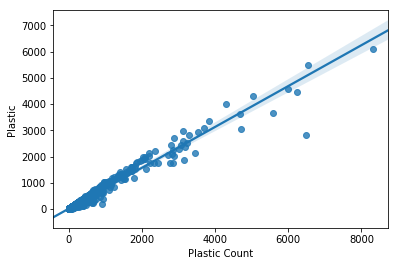

In [86]:
sns.regplot(x=mdmap_final["Plastic Count"], y=mdmap_final["Plastic"])

### Save to file.

In [87]:
mdmap_final.to_csv('data_processed/mdmap_totals_by_category.csv', index=False)